In [1]:
import pandas as pd

df = pd.read_csv('/content/diamonds.csv')

df.head()

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [2]:

null_values = df.isnull().sum()
print(null_values)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [3]:

df = df.dropna()

In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:

color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_mapping = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}
cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

df['color'] = df['color'].map(color_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)
df['cut'] = df['cut'].map(cut_mapping)

print(df.head())

   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75


In [6]:

df['size'] = df['x'] * df['y'] * df['z']
print(df.head())

   carat  cut  color  clarity  depth  table  price     x     y     z  \
0   0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31   
2   0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31   
3   0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63   
4   0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75   

        size  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250  


In [7]:

print(df.describe())

              carat           cut         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      3.904097      4.405803      4.051020     61.749405   
std        0.474011      1.116600      1.701105      1.647136      1.432621   
min        0.200000      1.000000      1.000000      1.000000     43.000000   
25%        0.400000      3.000000      3.000000      3.000000     61.000000   
50%        0.700000      4.000000      4.000000      4.000000     61.800000   
75%        1.040000      5.000000      6.000000      5.000000     62.500000   
max        5.010000      5.000000      7.000000      8.000000     79.000000   

              table         price             x             y             z  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean      57.457184   3932.799722      5.731157      5.734526      3.538734   
std        2.234491   3989.439738      1.121761    

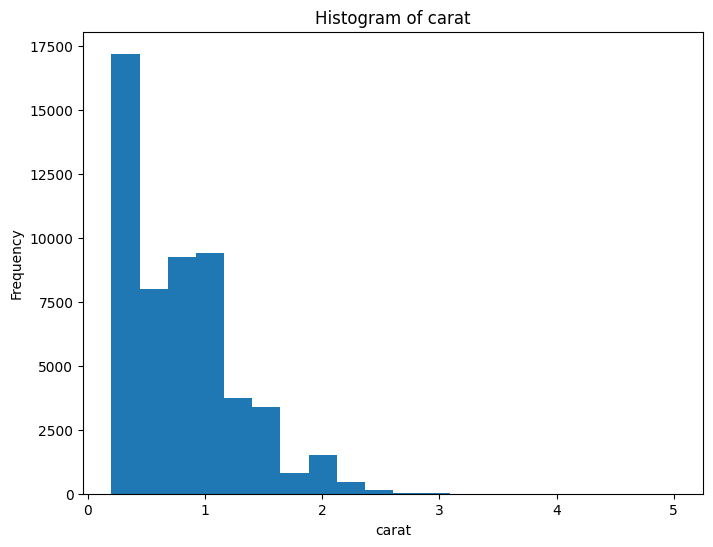

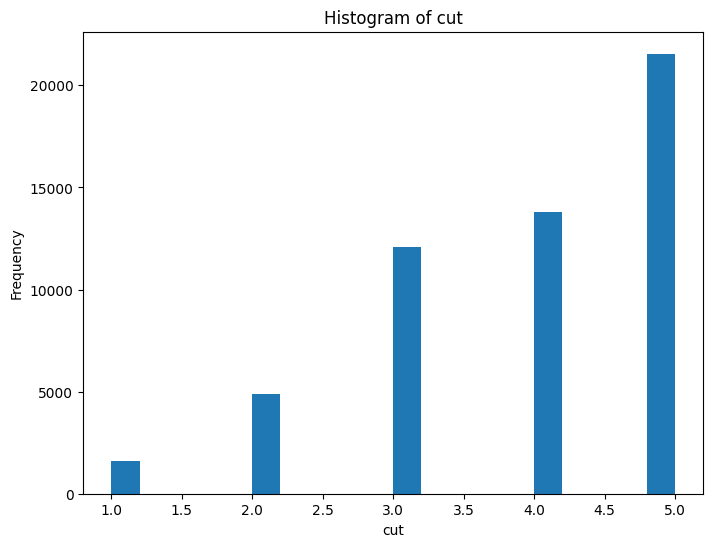

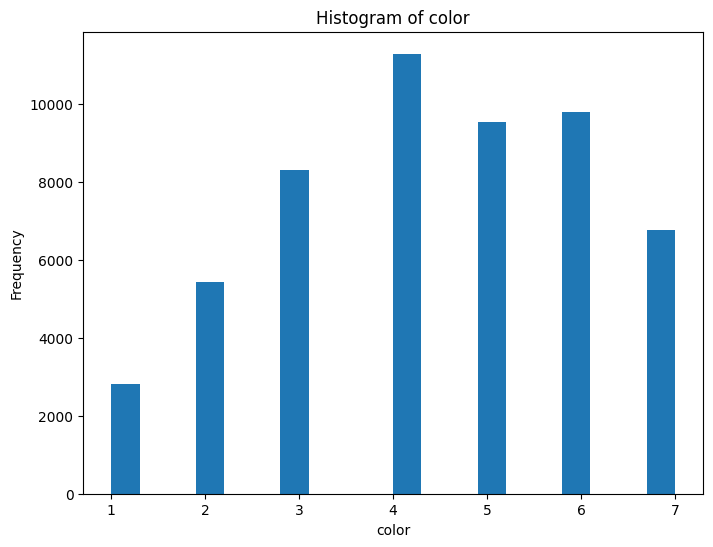

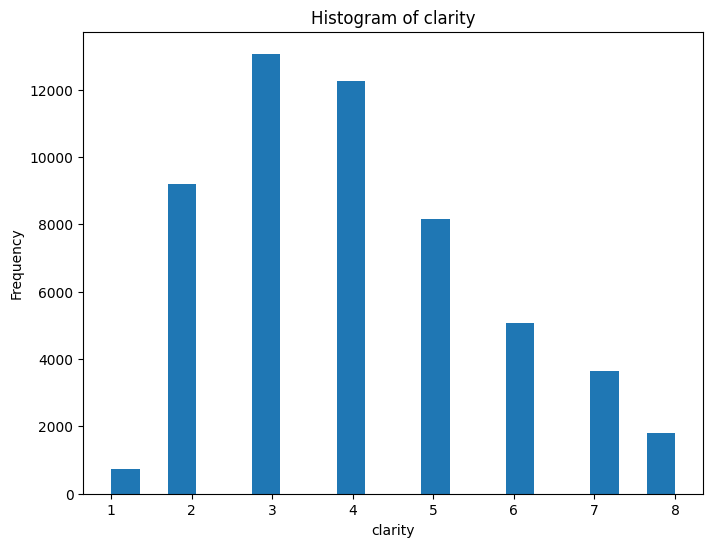

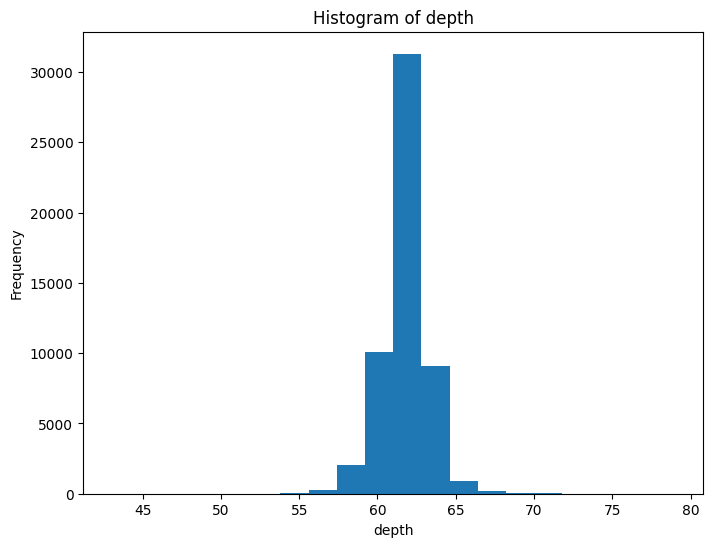

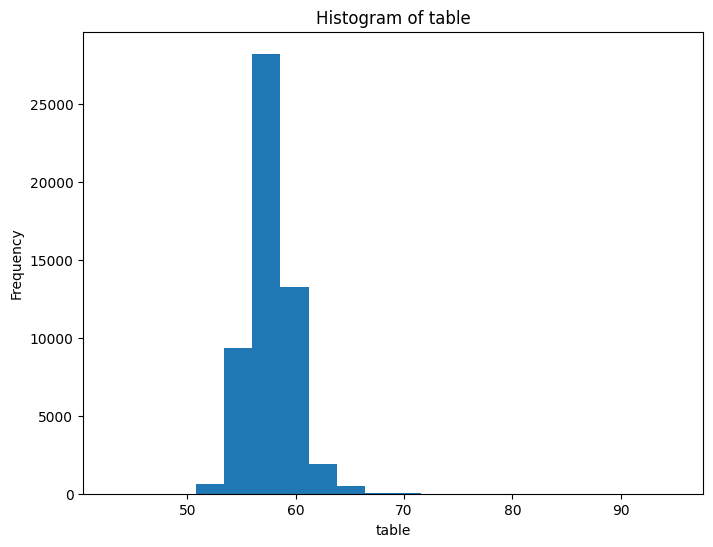

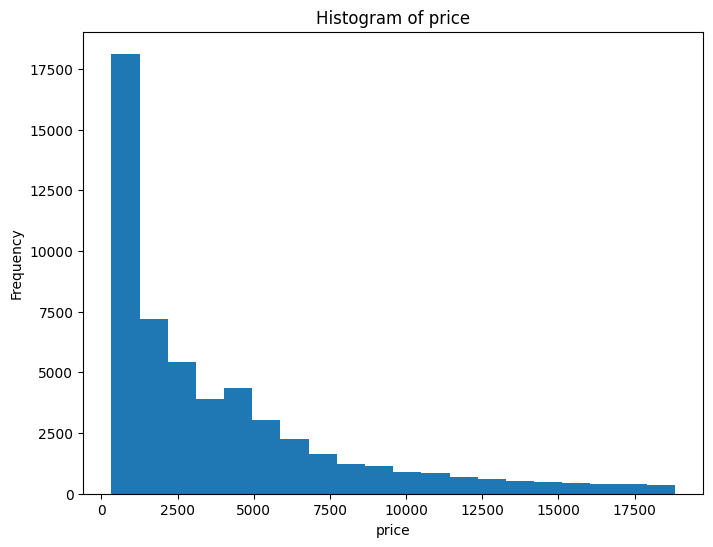

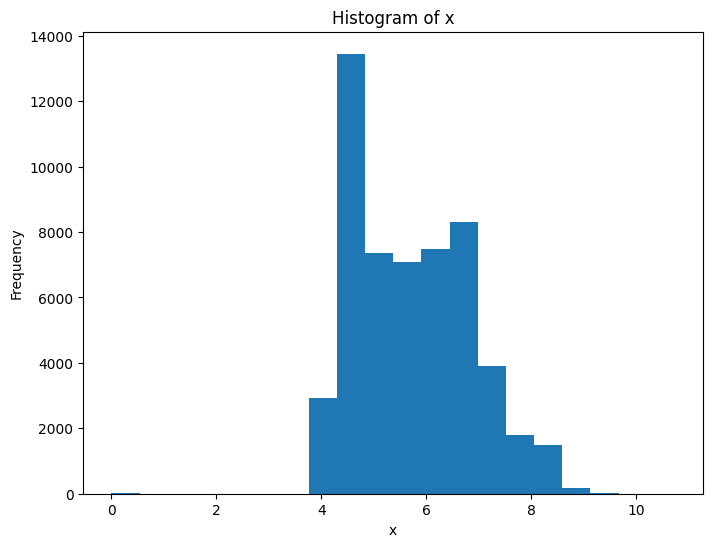

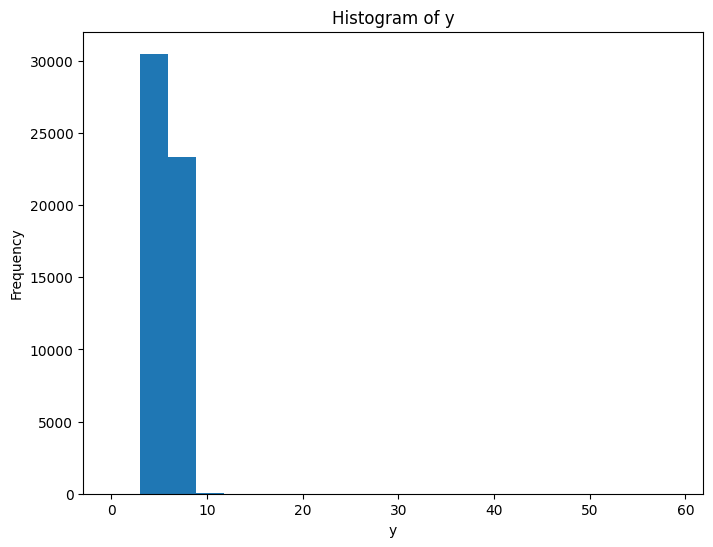

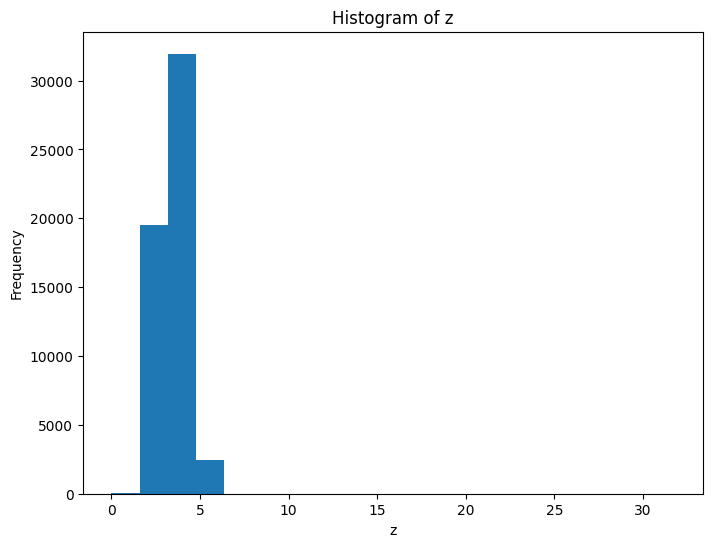

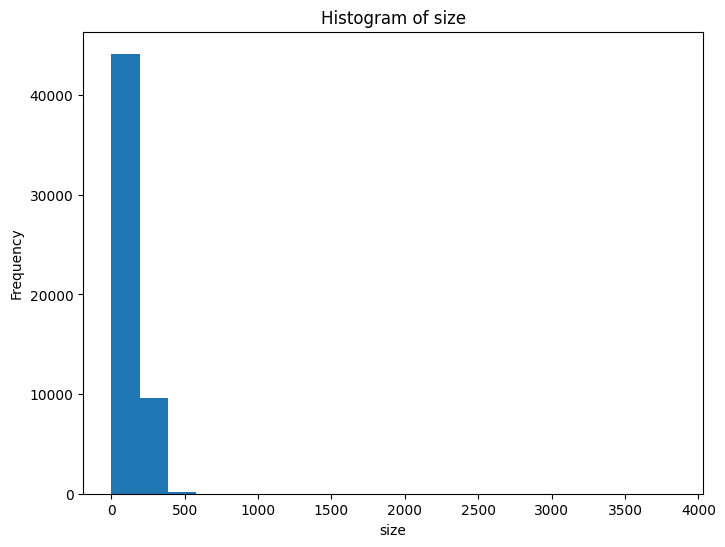

In [8]:
# Histogram

import matplotlib.pyplot as plt

for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20)  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

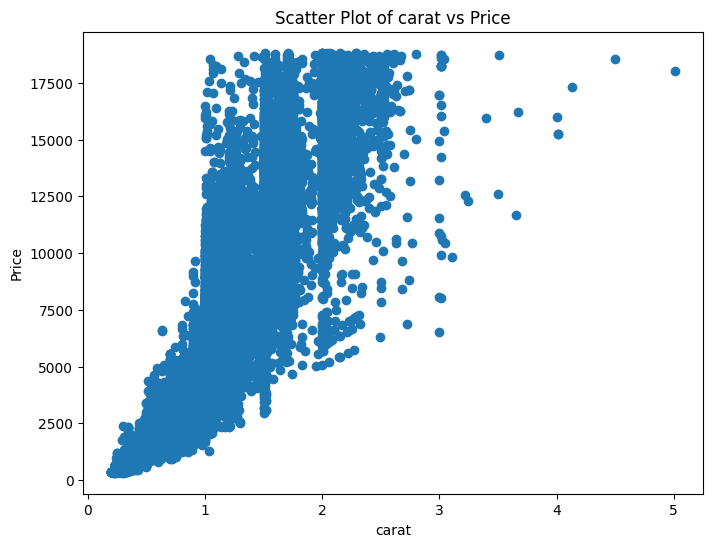

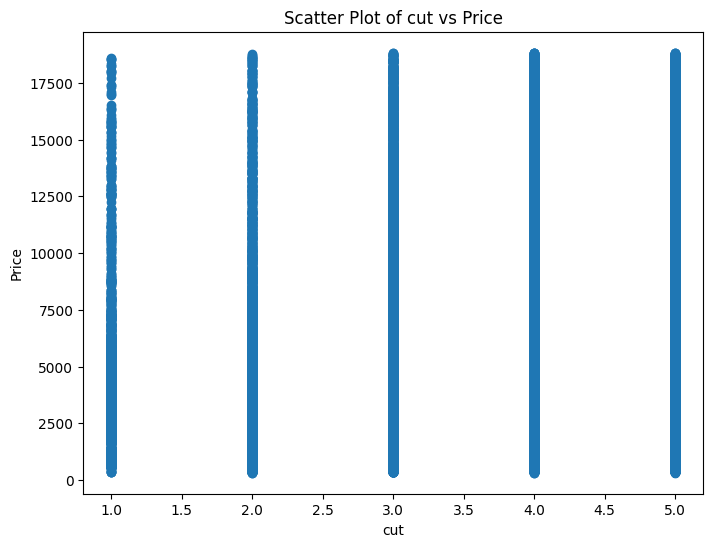

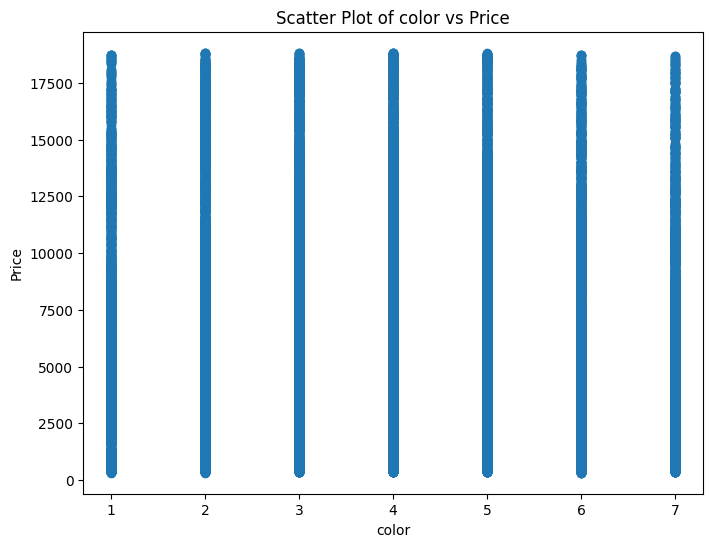

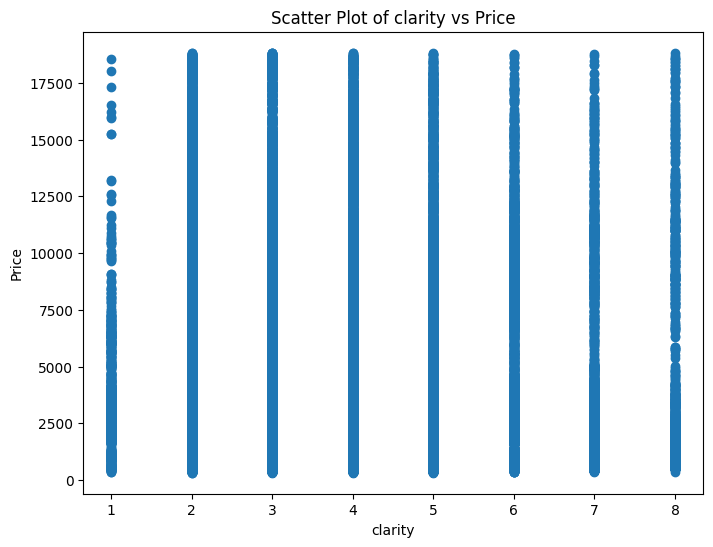

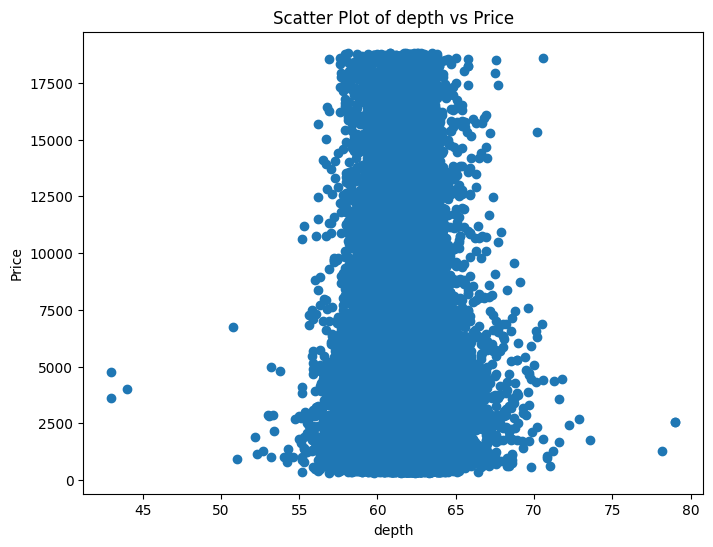

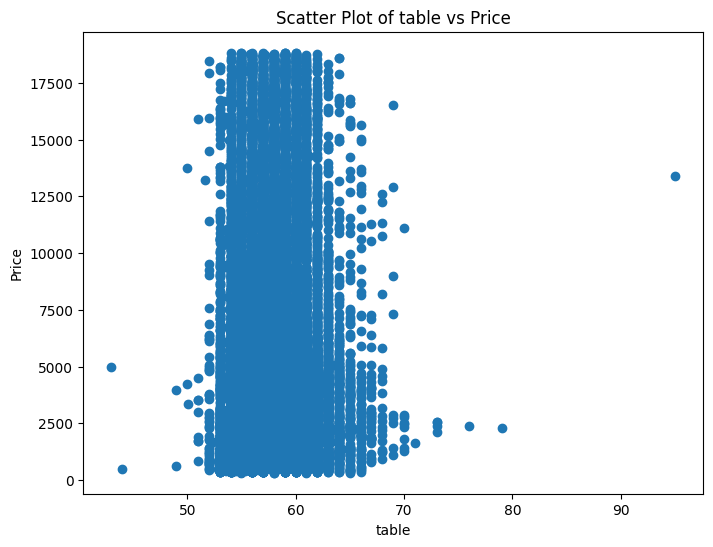

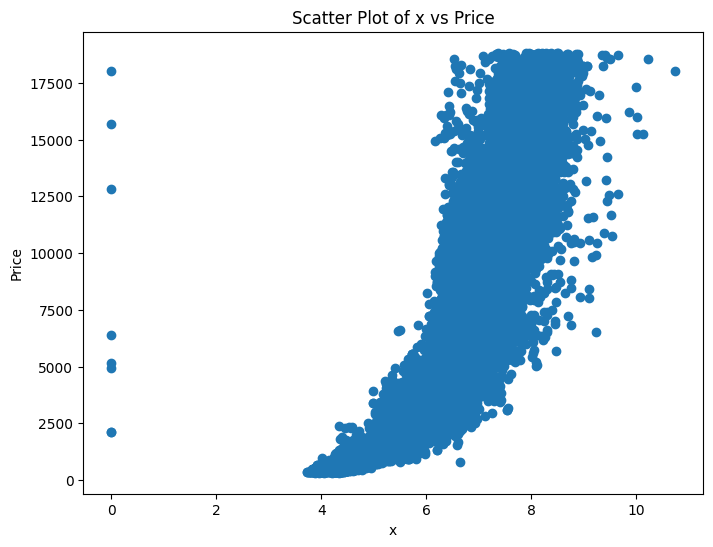

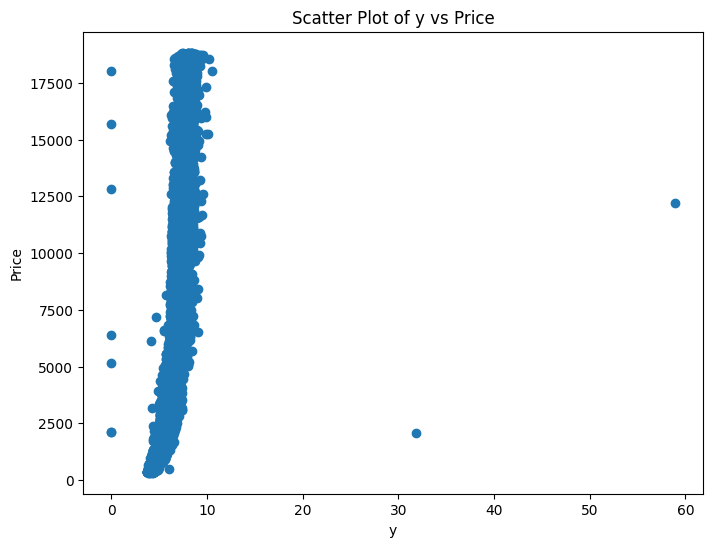

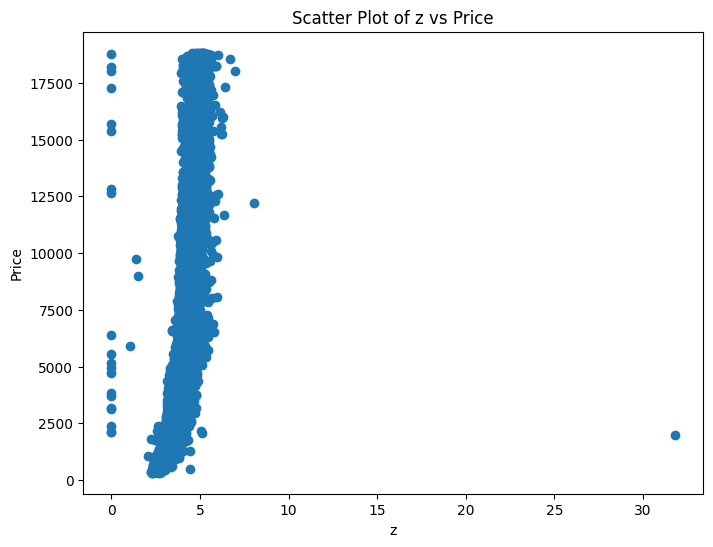

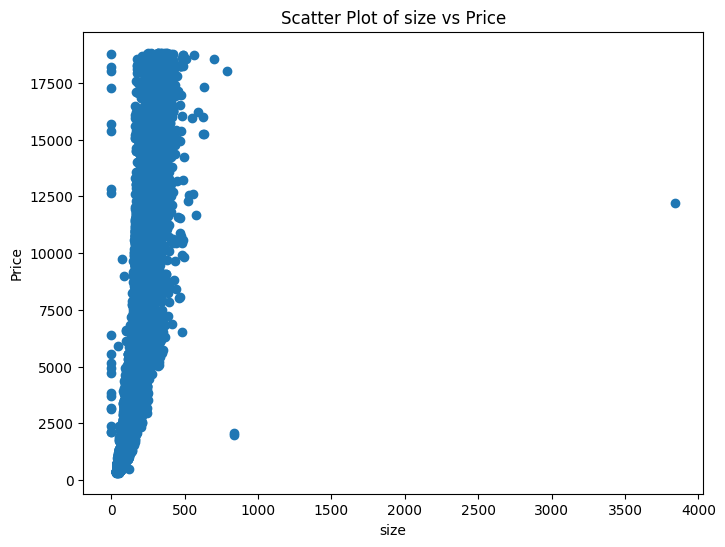

In [9]:

for column in df.columns:
  if pd.api.types.is_numeric_dtype(df[column]) and column != 'price':
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {column} vs Price')
    plt.show()

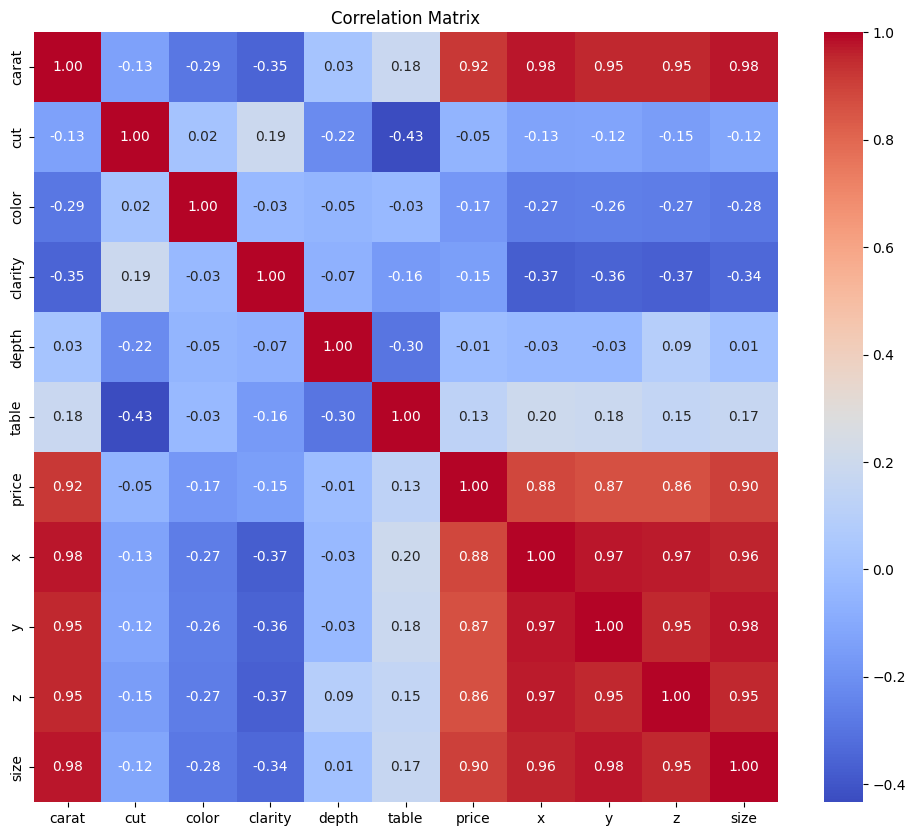

carat      0.921591
cut       -0.053491
color     -0.172511
clarity   -0.146800
depth     -0.010647
table      0.127134
price      1.000000
x          0.884435
y          0.865421
z          0.861249
size       0.902385
Name: price, dtype: float64


In [10]:
# Correalaton matrix

import seaborn as sns

correlation_matrix = df.corr()

# Correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix['price'])

In [11]:
df_first_18389 = df[:18390]
df_remaining = df[18390:]

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = df_first_18389.drop(['size', 'price'], axis=1)
y = df_first_18389['price']

x_test = df_remaining.drop(['size', 'price'], axis=1)
y_test = df_remaining['price']


In [13]:

null_values = x.isnull().sum()
print(null_values)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64


Mean Squared Error: 4554071.705448246
R-squared: 0.7975541615572482


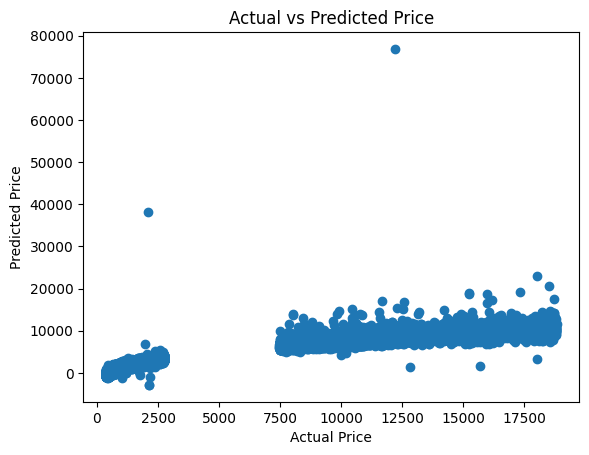

In [14]:

# linear regression model
model = LinearRegression()

model.fit(x, y)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [15]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]  
y = (df['price'] > df['price'].mean()).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9668149796069707


In [16]:

# feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

   feature  importance
7        y    0.826683
0    carat    0.051017
3  clarity    0.034575
2    color    0.033598
8        z    0.014120
6        x    0.013144
4    depth    0.011599
5    table    0.010444
1      cut    0.004819


In [17]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]  
y = (df['price'] > df['price'].mean()).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9561549870226177


In [19]:
# XGBoost
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]  
y = (df['price'] > df['price'].mean()).astype(int)  

categorical_columns = ['cut', 'color', 'clarity']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'alpha': 10,
    'learning_rate': 1.0,
    'n_estimators': 100
}

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)


joblib.dump(model, 'diamond_price_model.pkl')
print("Model saved as diamond_price_model.pkl")



XGBoost Model Accuracy: 0.9730255839822024
Model saved as diamond_price_model.pkl
